In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical

In [54]:
# Load the CSV files
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [55]:
# Extract features and labels
X_train = train_data.drop('label', axis=1).values.astype('float32')
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values.astype('float32')
y_test = test_data['label'].values

In [56]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [57]:
# Reshape the features for CNN input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [58]:
# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8150 - loss: 0.5202 - val_accuracy: 0.8739 - val_loss: 0.3488
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8989 - loss: 0.2812 - val_accuracy: 0.8988 - val_loss: 0.2868
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9197 - loss: 0.2228 - val_accuracy: 0.9060 - val_loss: 0.2688
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9344 - loss: 0.1803 - val_accuracy: 0.9105 - val_loss: 0.2558
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9435 - loss: 0.1514 - val_accuracy: 0.9122 - val_loss: 0.2571


In [62]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9147 - loss: 0.2483
Test loss: 0.23807650804519653, Test accuracy: 0.9200000166893005


In [63]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [64]:
# Confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Confusion Matrix:
[[916   0  10   5   1   1  61   0   6   0]
 [  4 988   1   4   1   0   0   0   2   0]
 [ 23   1 880   8  41   0  47   0   0   0]
 [ 22   5   9 909  24   0  29   0   2   0]
 [  4   0  60  12 876   0  48   0   0   0]
 [  0   1   0   0   0 984   0   6   1   8]
 [150   1  46  13  34   0 750   0   6   0]
 [  0   0   0   0   0  17   0 946   0  37]
 [  1   1   1   0   3   3   9   1 980   1]
 [  0   0   0   0   0   1   0  28   0 971]]

Classification Report:
              precision    recall  f1-score   support

     t_shirt       0.82      0.92      0.86      1000
     trouser       0.99      0.99      0.99      1000
    pullover       0.87      0.88      0.88      1000
       dress       0.96      0.91      0.93      1000
        coat       0.89      0.88      0.88      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.79      0.75      0.77      1000
     sneaker       0.96      0.95      0.96      100

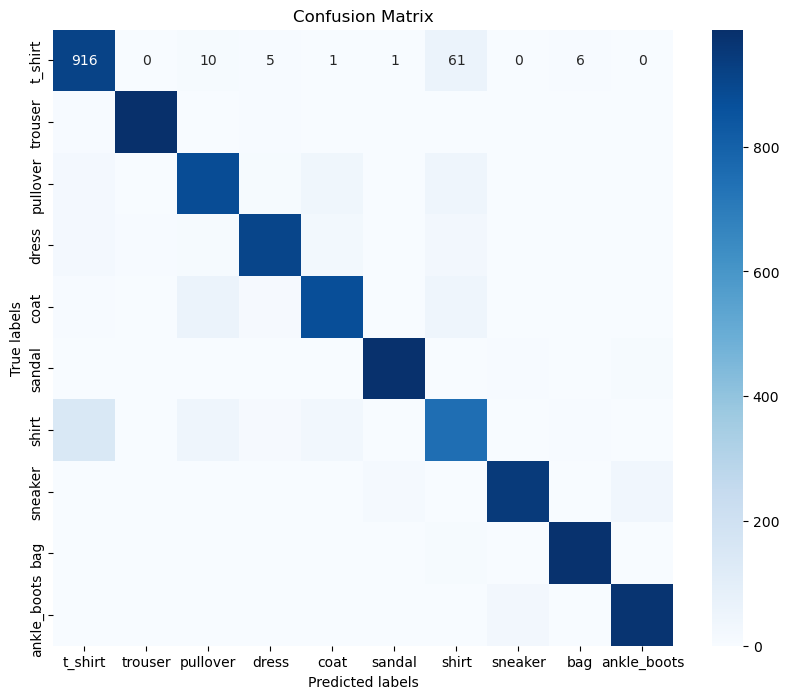

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [66]:
# Make predictions
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
predictions = model.predict(X_test[:1])
label = labels[np.argmax(predictions)]
print(f'Predicted label: {label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted label: t_shirt


t_shirt


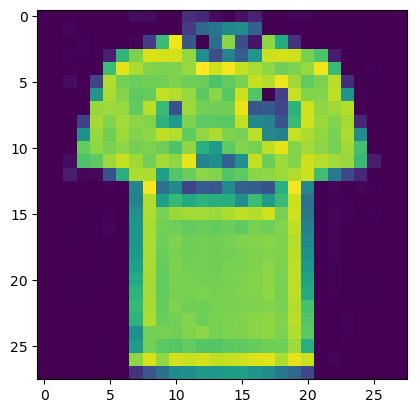

In [67]:
# Plot the image
import matplotlib.pyplot as plt
print(label)
plt.imshow(X_test[:1][0].reshape(28, 28))
plt.show()
